In [1]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar archivos CSV de México
mexico_hotel_room = pd.read_csv("mexico_hotel_room.csv")

In [3]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
mexico_hotel_room['price'] = mexico_hotel_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_15512\12200252.py:3: SyntaxWarning: invalid escape sequence '\$'
  mexico_hotel_room['price'] = mexico_hotel_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [4]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
   "name", "description", "neighborhood_overview", "host_name", "host_since",
  "host_location", "host_response_rate", "neighbourhood",
    "room_type", "bathrooms_text", "amenities", "host_neighbourhood",
   "neighbourhood_cleansed", "source", "host_response_time",
    "host_verifications", "host_has_profile_pic"
]

# Eliminar columnas del DataFrame
mexico_hotel_room = mexico_hotel_room.drop(columns=columnas_a_eliminar)

In [5]:
mexico_hotel_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           125 non-null    float64
 1   host_id                      125 non-null    int64  
 2   host_acceptance_rate         125 non-null    int64  
 3   property_type                125 non-null    object 
 4   price                        125 non-null    float64
 5   latitude                     125 non-null    float64
 6   longitude                    125 non-null    float64
 7   accommodates                 125 non-null    float64
 8   bathrooms                    125 non-null    float64
 9   bedrooms                     125 non-null    float64
 10  beds                         125 non-null    float64
 11  minimum_nights               125 non-null    int64  
 12  maximum_nights               125 non-null    int64  
 13  minimum_minimum_nigh

In [ ]:
#mexico_hotel_room.to_csv("mexico_hotel_room1.csv")

mexico_entire_home     
PRICE Vs host_acceptance_rate

In [23]:
mexico_hotel_room['property_type'] = mexico_hotel_room['property_type'].astype('category').cat.codes

In [24]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_hotel_room[['host_acceptance_rate']]
Vars_Dep=mexico_hotel_room['price']

In [8]:
#Se define model como funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [9]:
#verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [10]:
#Ajustamos

#matrices=letra mayuscula
#vector=letra minusculka
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [11]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-40.58374511]),
 'rank_': 1,
 'singular_': array([164.03521573]),
 'intercept_': 7108.992317398478}

Modelo matemático:y=-40.58374511 * 7108.992317398478

In [12]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.03415540198994649

In [25]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_hotel_room[['host_acceptance_rate']])
y_pred

array([3334.70402183, 3375.28776694, 3375.28776694, 3334.70402183,
       3497.03900228, 3497.03900228, 3497.03900228, 3497.03900228,
       3131.78529626, 5850.89621888, 3212.95278649, 3131.78529626,
       5850.89621888, 5850.89621888, 3050.61780603, 3050.61780603,
       3497.03900228, 5850.89621888, 3050.61780603, 3294.12027672,
       3091.20155115, 3172.36904138, 3050.61780603, 3091.20155115,
       3172.36904138, 3050.61780603, 3497.03900228, 3050.61780603,
       3050.61780603, 3050.61780603, 3050.61780603, 3050.61780603,
       3050.61780603, 3050.61780603, 3050.61780603, 3050.61780603,
       3050.61780603, 3050.61780603, 3050.61780603, 3050.61780603,
       3050.61780603, 3334.70402183, 3050.61780603, 3172.36904138,
       3050.61780603, 3050.61780603, 3050.61780603, 3050.61780603,
       3050.61780603, 3050.61780603, 3334.70402183, 3497.03900228,
       3050.61780603, 3050.61780603, 3334.70402183, 3050.61780603,
       3050.61780603, 3050.61780603, 3050.61780603, 3050.61780

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_hotel_room.insert(0, 'Predicciones', y_pred)
mexico_hotel_room

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

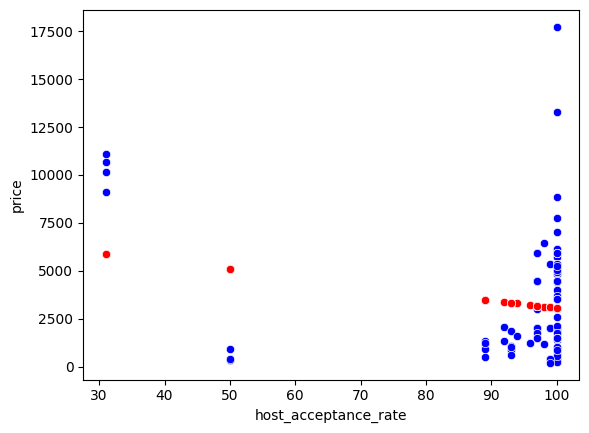

In [15]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=mexico_hotel_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=mexico_hotel_room)

In [27]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.03415540198994649

In [28]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1848118015440207

In [81]:
#sns.pairplot(mexico_entire_home)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_hotel_room.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

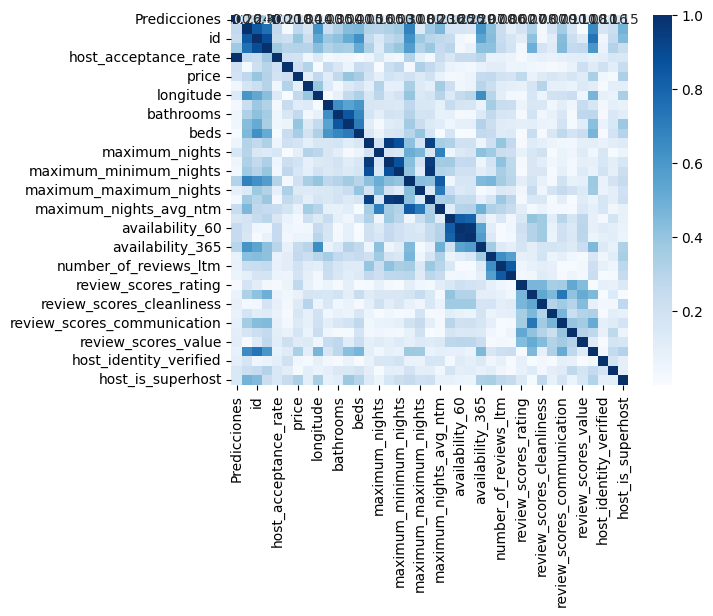

In [31]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_is_superhost”

In [32]:
mexico_hotel_room1 = pd.read_csv("mexico_hotel_room1.csv")

In [33]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]

Vars_Indep=mexico_hotel_room1[['host_is_superhost']]
Vars_Dep=mexico_hotel_room1['price']

In [34]:
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2446.49428763]),
 'rank_': 1,
 'singular_': array([4.87934422]),
 'intercept_': 3893.1505376344094}

Modelo matemático:y=-2446.49428763 * 3893.1505376344094

In [35]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.10982274519110014

In [37]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_hotel_room1[['host_is_superhost']])
y_pred

array([1446.65625   , 1446.65625   , 1446.65625   , 1446.65625   ,
       3893.15053763, 3893.15053763, 3893.15053763, 3893.15053763,
       3893.15053763, 3893.15053763, 3893.15053763, 1446.65625   ,
       3893.15053763, 3893.15053763, 1446.65625   , 3893.15053763,
       3893.15053763, 3893.15053763, 3893.15053763, 3893.15053763,
       3893.15053763, 1446.65625   , 1446.65625   , 1446.65625   ,
       1446.65625   , 1446.65625   , 3893.15053763, 3893.15053763,
       1446.65625   , 1446.65625   , 1446.65625   , 1446.65625   ,
       1446.65625   , 1446.65625   , 1446.65625   , 1446.65625   ,
       1446.65625   , 1446.65625   , 1446.65625   , 1446.65625   ,
       1446.65625   , 3893.15053763, 1446.65625   , 1446.65625   ,
       3893.15053763, 1446.65625   , 3893.15053763, 3893.15053763,
       3893.15053763, 1446.65625   , 3893.15053763, 3893.15053763,
       3893.15053763, 3893.15053763, 1446.65625   , 3893.15053763,
       3893.15053763, 3893.15053763, 3893.15053763, 3893.15053

In [38]:
#Insertamos la columna de predicciones en el Dataframe
mexico_hotel_room1.insert(0, 'Predicciones', y_pred)
mexico_hotel_room1

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,property_type,price,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_identity_verified,instant_bookable,host_is_superhost
0,1446.656250,0,2.811340e+05,196253,93,Room in serviced apartment,890.0,19.411240,-99.177480,3.0,...,4.71,5.00,5.00,5.00,5.00,4.86,0.06,1,0,1
1,1446.656250,1,1.565220e+06,2518152,92,Room in boutique hotel,1318.0,19.347350,-99.190160,2.0,...,5.00,5.00,5.00,4.96,4.93,4.93,0.21,1,0,1
2,1446.656250,2,1.736063e+06,2518152,92,Room in boutique hotel,2043.0,19.348600,-99.192960,2.0,...,4.84,4.97,4.89,4.93,4.96,4.86,0.45,1,0,1
3,1446.656250,3,5.711660e+05,196253,93,Room in serviced apartment,1872.0,19.413460,-99.177500,3.0,...,5.00,5.00,5.00,4.90,5.00,4.80,0.01,0,0,1
4,3893.150538,4,7.373280e+05,3850198,89,Room in serviced apartment,1275.0,19.430590,-99.170730,2.0,...,4.88,4.84,5.00,5.00,4.84,4.80,0.18,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3893.150538,120,1.190000e+18,547380140,97,Room in hotel,5951.0,19.435304,-99.148604,3.1,...,4.79,4.86,4.75,4.83,5.00,4.75,1.74,1,1,0
121,3893.150538,121,1.190000e+18,547380140,97,Room in hotel,5951.0,19.437363,-99.148698,3.1,...,4.79,4.86,4.75,4.83,5.00,4.75,1.74,1,1,0
122,3893.150538,122,1.190000e+18,547380140,97,Room in hotel,5951.0,19.435780,-99.146612,3.1,...,4.79,4.86,4.75,4.83,5.00,4.75,1.74,1,1,0
123,3893.150538,123,1.190000e+18,547380140,97,Room in hotel,1484.0,19.435180,-99.146790,2.0,...,4.79,4.86,4.75,4.83,5.00,4.75,1.74,1,0,0


<Axes: xlabel='host_is_superhost', ylabel='price'>

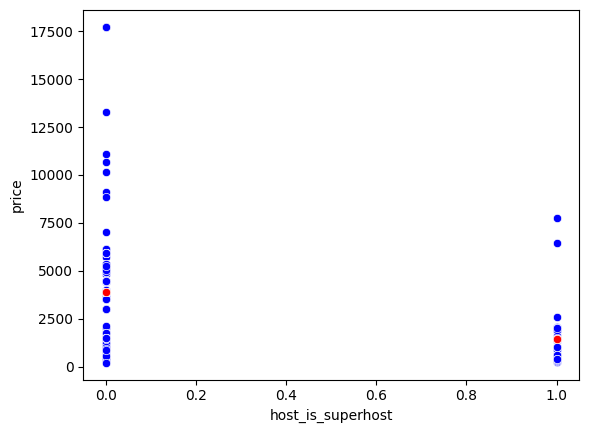

In [39]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=mexico_hotel_room1)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=mexico_hotel_room1)

In [40]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.10982274519110014

In [41]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.331395149619152

In [44]:
mexico_hotel_room1['property_type'] = mexico_hotel_room1['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_hotel_room1.corr()
Corr_Factors

In [40]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
Predicciones,1.000000,0.054592,0.037992,0.071653,1.000000,0.012018,0.045940,0.030873,0.071861,0.028578,...,0.071969,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,0.146332,0.000970,0.248486
Unnamed: 0,0.054592,1.000000,0.935519,0.461062,0.054592,0.007592,0.123097,0.017907,0.073505,0.057511,...,0.076235,0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.223907,0.010531
id,0.037992,0.935519,1.000000,0.414733,0.037992,0.005643,0.101712,0.001985,0.069465,0.055802,...,0.095550,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.202706,0.011514
host_id,0.071653,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,0.010091,...,0.018256,0.083707,0.002756,0.020969,0.061844,0.029476,0.020455,0.120174,0.108508,0.085795
host_acceptance_rate,1.000000,0.054592,0.037992,0.071653,1.000000,0.012018,0.045940,0.030873,0.071861,0.028578,...,0.071969,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,0.146332,0.000970,0.248486
price,0.012018,0.007592,0.005643,0.004901,0.012018,1.000000,0.010086,0.010823,0.018599,0.011392,...,0.001622,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,0.011681,0.013786,0.020353
latitude,0.045940,0.123097,0.101712,0.113206,0.045940,0.010086,1.000000,0.067917,0.067812,0.032024,...,0.072841,0.085069,0.080734,0.044939,0.056565,0.053265,0.051090,0.106904,0.020800,0.026725
longitude,0.030873,0.017907,0.001985,0.017153,0.030873,0.010823,0.067917,1.000000,0.008618,0.018909,...,0.032363,0.022928,0.044392,0.016458,0.001300,0.010071,0.024784,0.001281,0.000595,0.006967
accommodates,0.071861,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,0.008618,1.000000,0.084597,...,0.045440,0.060714,0.026843,0.047046,0.045523,0.014735,0.034789,0.061394,0.027081,0.004356
bathrooms,0.028578,0.057511,0.055802,0.010091,0.028578,0.011392,0.032024,0.018909,0.084597,1.000000,...,0.020672,0.034109,0.019639,0.009257,0.011923,0.002270,0.026342,0.055402,0.010986,0.089928


<Axes: >

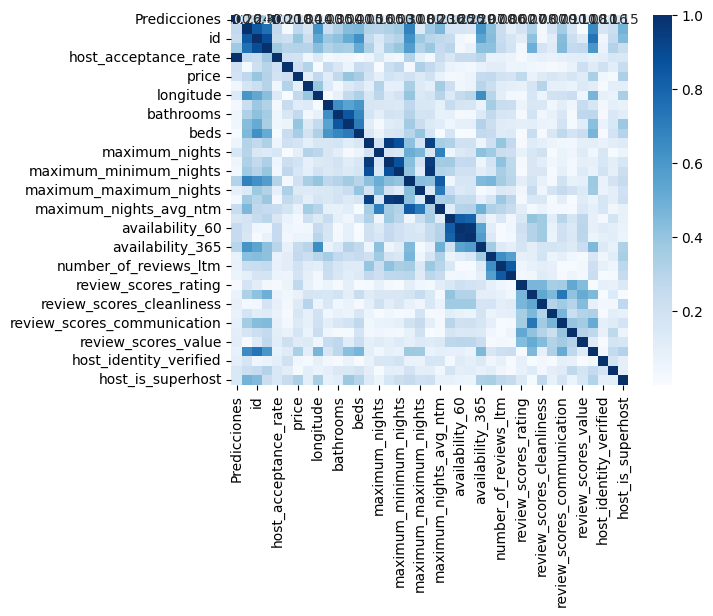

In [47]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“accommodates vs bathrooms” 


In [48]:
mexico_hotel_room2 = pd.read_csv("mexico_hotel_room1.csv")

In [49]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_hotel_room2[['bathrooms']]
Vars_Dep=mexico_hotel_room2['accommodates']

In [50]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.5118019]),
 'rank_': 1,
 'singular_': array([6.18970759]),
 'intercept_': 0.7896825264248113}

Modelo matemático:y=1.5118019 * 0.7896825264248113

In [51]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.40512805488346737

In [52]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_hotel_room2[['bathrooms']])
y_pred

array([3.05738537, 3.05738537, 3.05738537, 2.30148442, 2.30148442,
       2.30148442, 2.30148442, 2.30148442, 2.30148442, 2.90620518,
       2.30148442, 3.81328632, 2.90620518, 2.90620518, 2.30148442,
       2.30148442, 3.05738537, 2.90620518, 3.05738537, 3.05738537,
       2.30148442, 2.30148442, 2.30148442, 2.30148442, 2.30148442,
       3.05738537, 3.05738537, 2.30148442, 2.30148442, 3.05738537,
       3.05738537, 3.05738537, 3.05738537, 3.05738537, 3.05738537,
       3.05738537, 3.05738537, 3.05738537, 3.05738537, 3.05738537,
       3.05738537, 2.30148442, 3.05738537, 2.30148442, 2.30148442,
       3.05738537, 3.05738537, 2.30148442, 3.05738537, 3.05738537,
       2.30148442, 3.05738537, 3.05738537, 2.30148442, 3.05738537,
       3.05738537, 2.30148442, 2.30148442, 2.30148442, 3.05738537,
       2.30148442, 2.30148442, 2.30148442, 2.30148442, 2.30148442,
       3.05738537, 3.05738537, 3.05738537, 2.30148442, 3.05738537,
       2.30148442, 3.05738537, 2.30148442, 3.05738537, 3.05738

In [53]:
#Insertamos la columna de predicciones en el Dataframe
mexico_hotel_room2.insert(0, 'Predicciones', y_pred)
mexico_hotel_room2


,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,property_type,price,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_identity_verified,instant_bookable,host_is_superhost
0,3.057385,0,2.811340e+05,196253,93,Room in serviced apartment,890.0,19.411240,-99.177480,3.0,...,4.71,5.00,5.00,5.00,5.00,4.86,0.06,1,0,1
1,3.057385,1,1.565220e+06,2518152,92,Room in boutique hotel,1318.0,19.347350,-99.190160,2.0,...,5.00,5.00,5.00,4.96,4.93,4.93,0.21,1,0,1
2,3.057385,2,1.736063e+06,2518152,92,Room in boutique hotel,2043.0,19.348600,-99.192960,2.0,...,4.84,4.97,4.89,4.93,4.96,4.86,0.45,1,0,1
3,2.301484,3,5.711660e+05,196253,93,Room in serviced apartment,1872.0,19.413460,-99.177500,3.0,...,5.00,5.00,5.00,4.90,5.00,4.80,0.01,0,0,1
4,2.301484,4,7.373280e+05,3850198,89,Room in serviced apartment,1275.0,19.430590,-99.170730,2.0,...,4.88,4.84,5.00,5.00,4.84,4.80,0.18,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2.906205,120,1.190000e+18,547380140,97,Room in hotel,5951.0,19.435304,-99.148604,3.1,...,4.79,4.86,4.75,4.83,5.00,4.75,1.74,1,1,0
121,2.906205,121,1.190000e+18,547380140,97,Room in hotel,5951.0,19.437363,-99.148698,3.1,...,4.79,4.86,4.75,4.83,5.00,4.75,1.74,1,1,0
122,2.906205,122,1.190000e+18,547380140,97,Room in hotel,5951.0,19.435780,-99.146612,3.1,...,4.79,4.86,4.75,4.83,5.00,4.75,1.74,1,1,0
123,2.301484,123,1.190000e+18,547380140,97,Room in hotel,1484.0,19.435180,-99.146790,2.0,...,4.79,4.86,4.75,4.83,5.00,4.75,1.74,1,0,0


<Axes: xlabel='bathrooms', ylabel='accommodates'>

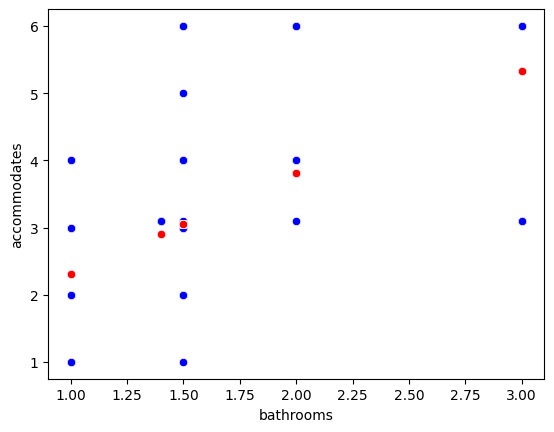

In [54]:

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=mexico_hotel_room2)
sns.scatterplot(x='bathrooms', y='Predicciones', color="red", data=mexico_hotel_room2)


In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.40512805488346737

In [56]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6364967045346482

In [61]:
mexico_hotel_room2['property_type'] = mexico_hotel_room2['property_type'].astype('category').cat.codes

In [ ]:

#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_hotel_room2.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


<Axes: >

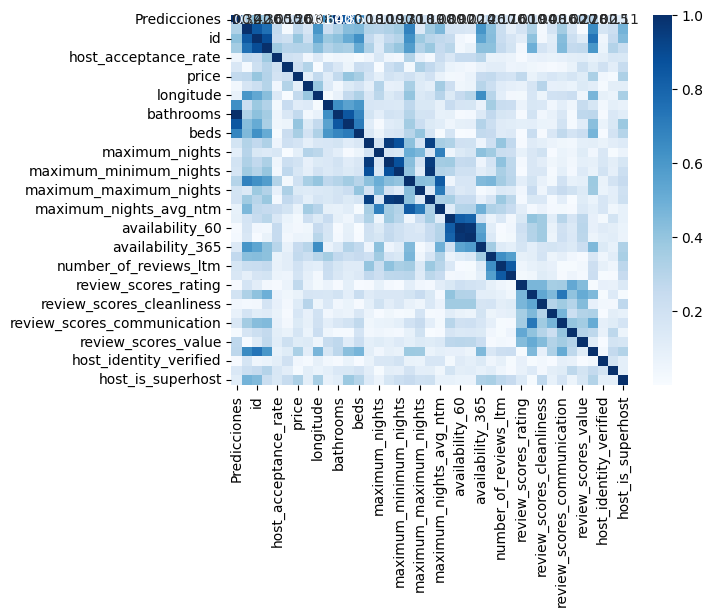

In [64]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

price vs review_scores_cleanliness

In [65]:
mexico_hotel_room3 = pd.read_csv("mexico_hotel_room1.csv")

In [66]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_hotel_room3[['review_scores_cleanliness']]
Vars_Dep=mexico_hotel_room3['price']


In [67]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([3166.93492303]),
 'rank_': 1,
 'singular_': array([1.43496509]),
 'intercept_': -12140.163723150807}

Modelo matemático:y=3166.93492303 * -12140.163723150807

In [68]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.01591629269439887

In [69]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_hotel_room3[['review_scores_cleanliness']])
y_pred

array([3694.51089201, 3694.51089201, 3599.50284432, 3694.51089201,
       3187.80130432, 3504.49479662, 3282.80935201, 3599.50284432,
       3694.51089201, 3061.1239074 , 3472.82544739, 3314.47870124,
       3251.14000278, 3694.51089201, 3377.8173997 , 2554.41431971,
       2776.09976433, 3251.14000278, 3409.48674893, 3694.51089201,
       3061.1239074 , 3409.48674893, 3694.51089201, 2332.7288751 ,
       2586.08366895, 3124.46260586, 3061.1239074 , 3472.82544739,
       3346.14805047, 2111.04343049, 2111.04343049, 3694.51089201,
       3694.51089201, 3694.51089201, 1889.35798588, 1921.02733511,
       2332.7288751 , 1889.35798588, 3061.1239074 , 3061.1239074 ,
       2744.4304151 , 2142.71277972, 3694.51089201, 3694.51089201,
       3694.51089201, 3251.14000278, 3694.51089201, 3694.51089201,
       3694.51089201, 3251.14000278, 2871.10781202, 3694.51089201,
       3251.14000278, 3694.51089201, 3694.51089201, 3694.51089201,
       3694.51089201, 3536.16414585, 3472.82544739, 3694.51089

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_hotel_room3.insert(0, 'Predicciones', y_pred)
mexico_hotel_room3

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

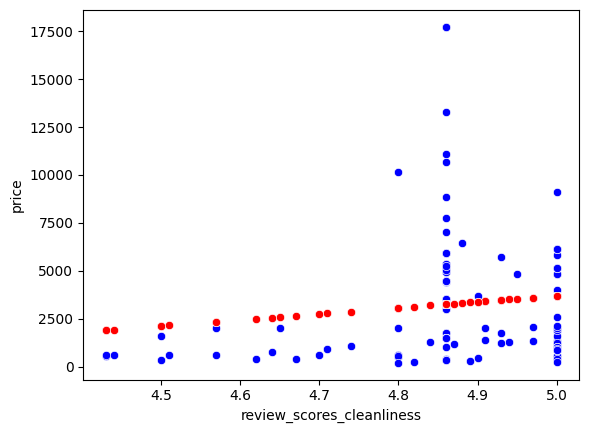

In [71]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=mexico_hotel_room3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=mexico_hotel_room3)

In [72]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.01591629269439887

In [73]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12615979032322014

In [75]:
mexico_hotel_room3['property_type'] = mexico_hotel_room3['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_hotel_room3.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

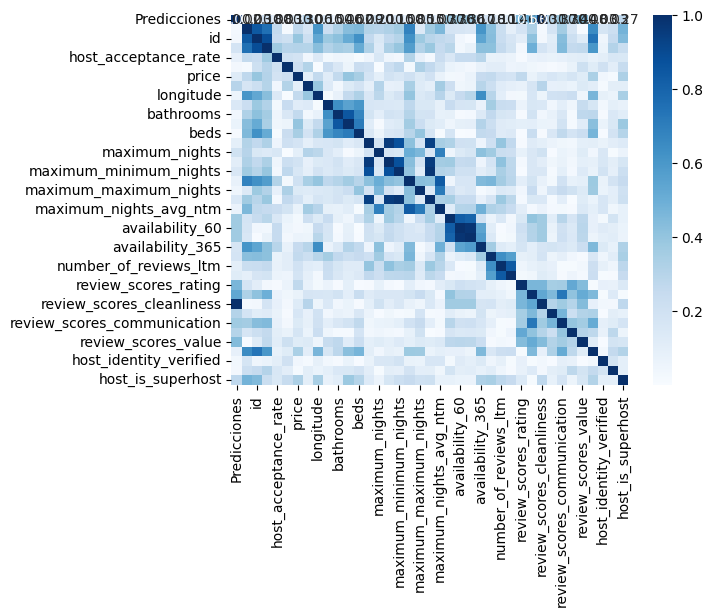

In [78]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_identity_verified”


In [79]:
mexico_hotel_room4 = pd.read_csv("mexico_hotel_room1.csv")

In [80]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_hotel_room4[['host_identity_verified']]
Vars_Dep=mexico_hotel_room4['price']


In [81]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-513.78087167]),
 'rank_': 1,
 'singular_': array([2.57060304]),
 'intercept_': 3751.8571428571427}

Modelo matemático:y=-513.78087167 * 3751.8571428571427


In [82]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)


0.0013443330202929094

In [ ]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_hotel_room4[['host_identity_verified']])
y_pred


In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_hotel_room4.insert(0, 'Predicciones', y_pred)
mexico_hotel_room4


<Axes: xlabel='host_identity_verified', ylabel='price'>

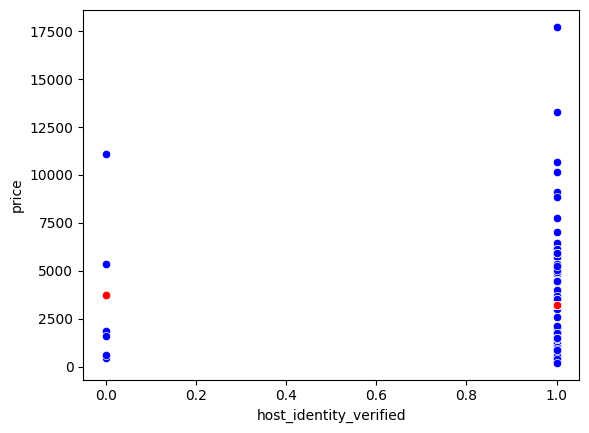

In [86]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=mexico_hotel_room4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=mexico_hotel_room4)


In [87]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0013443330202929094

In [88]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.03666514721493573

In [90]:
mexico_hotel_room4['property_type'] = mexico_hotel_room4['property_type'].astype('category').cat.codes

In [91]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_hotel_room4.corr()
Corr_Factors


,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,property_type,price,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_identity_verified,instant_bookable,host_is_superhost
Predicciones,1.000000,-0.175499,-0.047181,-0.064845,-0.106017,0.200455,0.036665,-0.019353,-0.089449,0.032366,...,-0.012106,0.033963,0.005954,-0.091604,0.075264,0.007779,0.032184,-1.000000,-0.182671,0.096310
Unnamed: 0,-0.175499,1.000000,0.841371,0.751958,0.260580,-0.018349,0.271988,0.170284,0.607733,0.224295,...,-0.327394,0.022612,-0.177373,-0.355949,-0.170022,0.004712,0.651813,0.175499,0.222633,-0.478552
id,-0.047181,0.841371,1.000000,0.888508,0.241250,0.212070,0.393663,0.221339,0.528409,0.379563,...,-0.413937,-0.029472,-0.113565,-0.433610,-0.223049,-0.128805,0.736738,0.047181,0.254431,-0.447343
host_id,-0.064845,0.751958,0.888508,1.000000,0.372259,0.298437,0.305289,0.301864,0.430060,0.315911,...,-0.496303,-0.179315,-0.125401,-0.449158,-0.258170,-0.267652,0.602506,0.064845,0.307507,-0.230303
host_acceptance_rate,-0.106017,0.260580,0.241250,0.372259,1.000000,0.207363,-0.184812,0.039149,0.140947,0.027690,...,-0.069276,-0.083339,0.072884,-0.085121,-0.105772,-0.113730,0.079500,0.106017,0.157627,0.149298
property_type,0.200455,-0.018349,0.212070,0.298437,0.207363,1.000000,-0.216118,0.311031,-0.003190,0.238965,...,-0.042195,-0.028634,0.012746,0.028809,-0.073117,-0.212662,0.119486,-0.200455,0.109275,0.243525
price,0.036665,0.271988,0.393663,0.305289,-0.184812,-0.216118,1.000000,0.095564,0.259858,0.117398,...,-0.071157,0.126160,0.162784,-0.133664,0.173917,0.118710,0.333016,-0.036665,0.018519,-0.331395
latitude,-0.019353,0.170284,0.221339,0.301864,0.039149,0.311031,0.095564,1.000000,0.388455,0.133178,...,-0.171566,-0.300268,-0.082851,-0.087884,-0.067088,-0.133669,0.110028,0.019353,0.104614,0.104492
longitude,-0.089449,0.607733,0.528409,0.430060,0.140947,-0.003190,0.259858,0.388455,1.000000,0.010497,...,-0.160934,0.057902,-0.195658,-0.201588,-0.226269,0.044524,0.469073,0.089449,0.066520,-0.340357
accommodates,0.032366,0.224295,0.379563,0.315911,0.027690,0.238965,0.117398,0.133178,0.010497,1.000000,...,-0.157545,-0.148228,-0.036744,-0.099566,-0.050798,-0.245362,0.164777,-0.032366,0.096226,-0.075790


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


<Axes: >

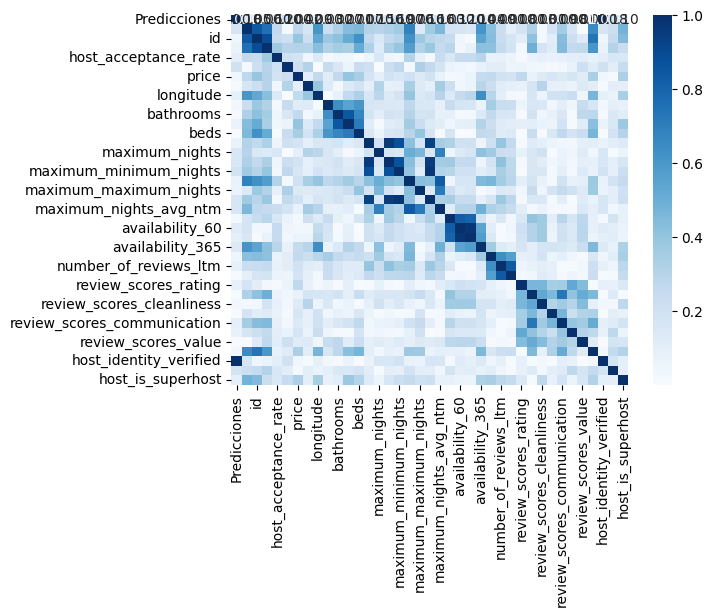

In [93]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs instant_bookable”


In [94]:
mexico_hotel_room5 = pd.read_csv("mexico_hotel_room1.csv")

In [95]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_hotel_room5[['instant_bookable']]
Vars_Dep=mexico_hotel_room5['price']


In [96]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([124.3]),
 'rank_': 1,
 'singular_': array([5.36656315]),
 'intercept_': 3222.1}

Modelo matemático:y=124.3 * 3222.1

In [97]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0003429380818923411

In [98]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_hotel_room5[['instant_bookable']])
y_pred

array([3222.1, 3222.1, 3222.1, 3222.1, 3222.1, 3346.4, 3222.1, 3222.1,
       3222.1, 3222.1, 3222.1, 3222.1, 3222.1, 3222.1, 3222.1, 3346.4,
       3222.1, 3222.1, 3222.1, 3222.1, 3222.1, 3346.4, 3346.4, 3222.1,
       3346.4, 3346.4, 3222.1, 3346.4, 3222.1, 3222.1, 3222.1, 3346.4,
       3222.1, 3346.4, 3222.1, 3222.1, 3222.1, 3346.4, 3222.1, 3222.1,
       3222.1, 3346.4, 3222.1, 3222.1, 3222.1, 3346.4, 3222.1, 3222.1,
       3222.1, 3222.1, 3222.1, 3222.1, 3222.1, 3222.1, 3346.4, 3346.4,
       3222.1, 3222.1, 3346.4, 3222.1, 3346.4, 3222.1, 3346.4, 3222.1,
       3222.1, 3222.1, 3222.1, 3346.4, 3222.1, 3222.1, 3222.1, 3222.1,
       3346.4, 3222.1, 3222.1, 3346.4, 3222.1, 3222.1, 3346.4, 3222.1,
       3222.1, 3346.4, 3346.4, 3346.4, 3346.4, 3346.4, 3346.4, 3346.4,
       3222.1, 3346.4, 3346.4, 3222.1, 3346.4, 3222.1, 3222.1, 3222.1,
       3346.4, 3346.4, 3346.4, 3346.4, 3346.4, 3222.1, 3222.1, 3346.4,
       3346.4, 3346.4, 3222.1, 3222.1, 3346.4, 3222.1, 3222.1, 3222.1,
      

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_hotel_room5.insert(0, 'Predicciones', y_pred)
mexico_hotel_room5


<Axes: xlabel='instant_bookable', ylabel='price'>

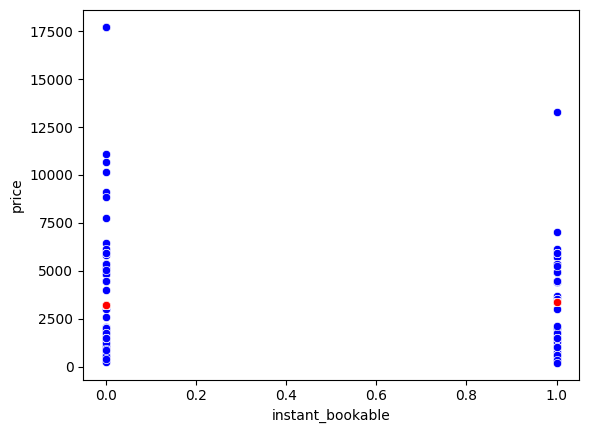

In [100]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=mexico_hotel_room5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=mexico_hotel_room5)


In [101]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0003429380818923411

In [102]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.018518587470224102

In [104]:
mexico_hotel_room5['property_type'] = mexico_hotel_room5['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_hotel_room5.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

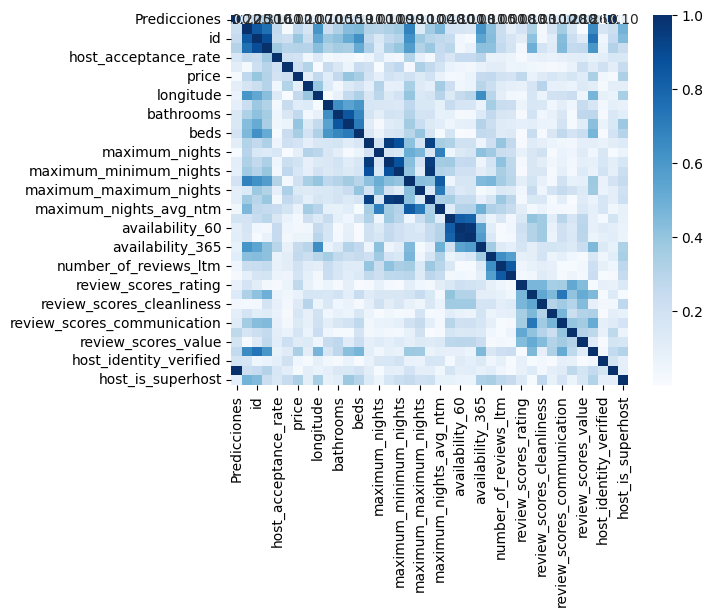

In [107]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“Price vs property_type”


In [108]:
mexico_hotel_room6 = pd.read_csv("mexico_hotel_room1.csv")

In [109]:
mexico_hotel_room6['property_type'] = mexico_hotel_room6['property_type'].astype('category').cat.codes


In [ ]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_hotel_room6[['property_type']]
Vars_Dep=mexico_hotel_room6['price']


In [114]:
# Ver categorías únicas de room_type
mexico_hotel_room6['property_type'].unique()

array([6, 2, 1, 0, 5, 3, 4], dtype=int8)

In [115]:
mexico_hotel_room6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   125 non-null    int64  
 1   id                           125 non-null    float64
 2   host_id                      125 non-null    int64  
 3   host_acceptance_rate         125 non-null    int64  
 4   property_type                125 non-null    int8   
 5   price                        125 non-null    float64
 6   latitude                     125 non-null    float64
 7   longitude                    125 non-null    float64
 8   accommodates                 125 non-null    float64
 9   bathrooms                    125 non-null    float64
 10  bedrooms                     125 non-null    float64
 11  beds                         125 non-null    float64
 12  minimum_nights               125 non-null    int64  
 13  maximum_nights      

In [116]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-374.20341959]),
 'rank_': 1,
 'singular_': array([20.8038458]),
 'intercept_': 4778.629815157117}

Modelo matemático:y=-374.20341959 * 4778.629815157117

In [117]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.046707188417516754

In [118]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_hotel_room6[['property_type']])
y_pred

array([2533.4092976 , 4030.22297597, 4030.22297597, 2533.4092976 ,
       2533.4092976 , 2533.4092976 , 2533.4092976 , 2533.4092976 ,
       2533.4092976 , 4404.42639556, 2533.4092976 , 2533.4092976 ,
       4404.42639556, 2533.4092976 , 2533.4092976 , 4778.62981516,
       4030.22297597, 2533.4092976 , 2533.4092976 , 2533.4092976 ,
       4778.62981516, 2533.4092976 , 2533.4092976 , 2533.4092976 ,
       2533.4092976 , 2533.4092976 , 4030.22297597, 2533.4092976 ,
       2533.4092976 , 2907.61271719, 2907.61271719, 2907.61271719,
       2907.61271719, 2907.61271719, 2907.61271719, 2907.61271719,
       2907.61271719, 2907.61271719, 2907.61271719, 2907.61271719,
       2907.61271719, 4404.42639556, 4030.22297597, 2533.4092976 ,
       4030.22297597, 2533.4092976 , 2533.4092976 , 2533.4092976 ,
       2533.4092976 , 4030.22297597, 4404.42639556, 4030.22297597,
       3656.01955638, 4404.42639556, 2533.4092976 , 2533.4092976 ,
       4404.42639556, 4404.42639556, 4404.42639556, 4404.42639

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_hotel_room6.insert(0, 'Predicciones', y_pred)
mexico_hotel_room6


<Axes: xlabel='property_type', ylabel='price'>

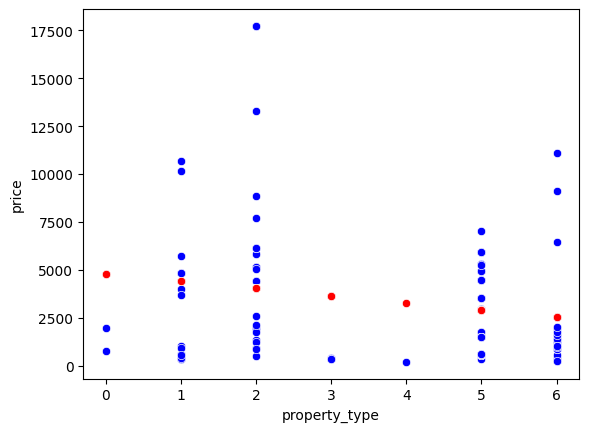

In [120]:
sns.scatterplot(x='property_type', y='price', color="blue", data=mexico_hotel_room6)
sns.scatterplot(x='property_type', y='Predicciones', color="red", data=mexico_hotel_room6)

In [121]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.046707188417516754

In [122]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21611845922437248

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_hotel_room6.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

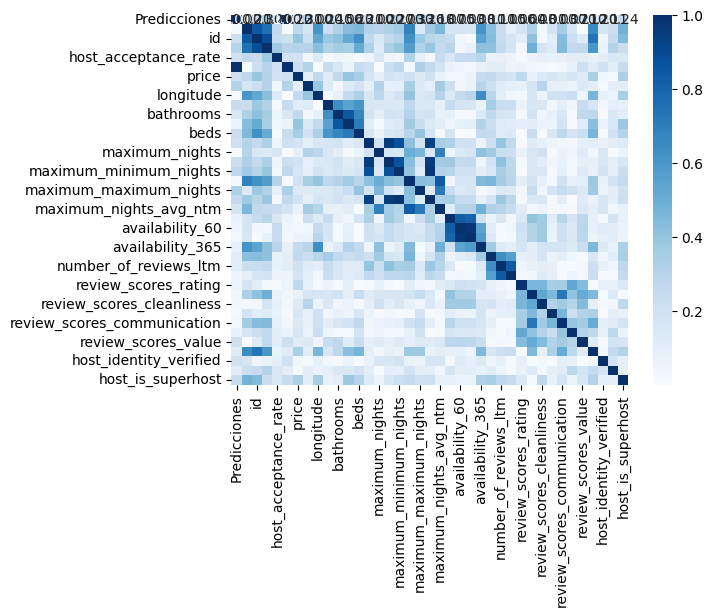

In [125]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map